EDA(탐색적 데이터분석)
  - 셈플의 분포도(편향여부)  3:1
  - 결측치
  - 이상치
  - 각종시각화를 통해 피처의 특성을 파악
  - train test split 할때 옵션으로 반영 및 비율을 편향을 고려하여 설정

In [1]:
!unzip '/content/drive/MyDrive/안전운전/porto-seguro-safe-driver-prediction.zip'

Archive:  /content/drive/MyDrive/안전운전/porto-seguro-safe-driver-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.info()

In [ ]:
import numpy as np
train_copy = train.copy().replace(-1,np.NaN)
train_copy.info()

피처가 많을때는 missingno 패키지를 이용해서 시각화

In [8]:
import missingno as msno

<Axes: >

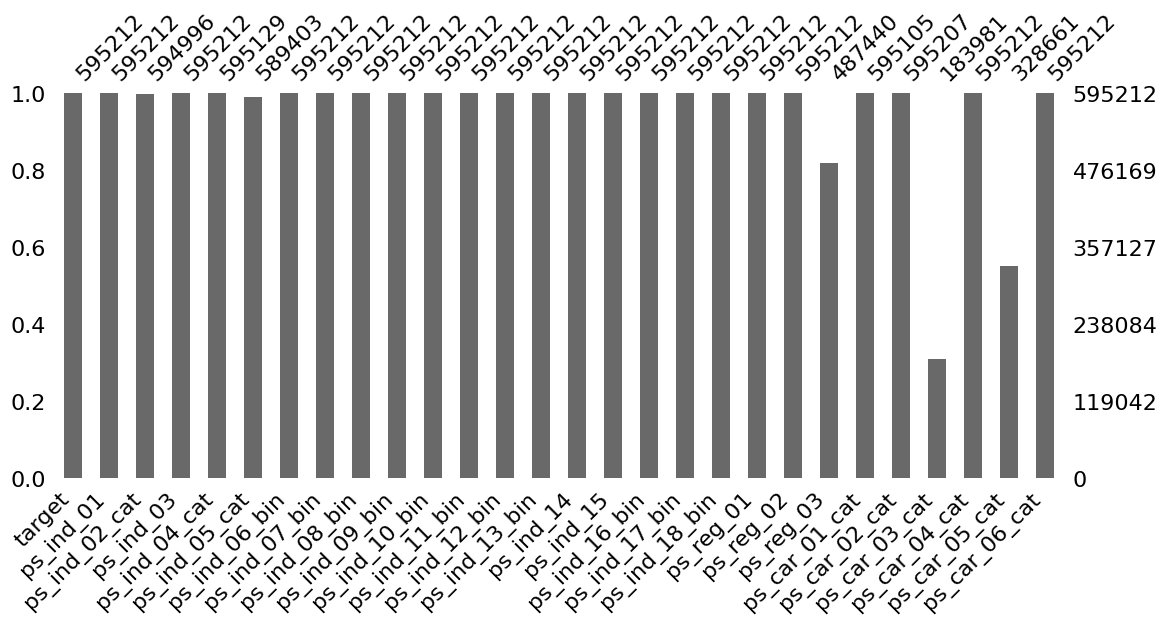

In [10]:
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13,5))

<Axes: >

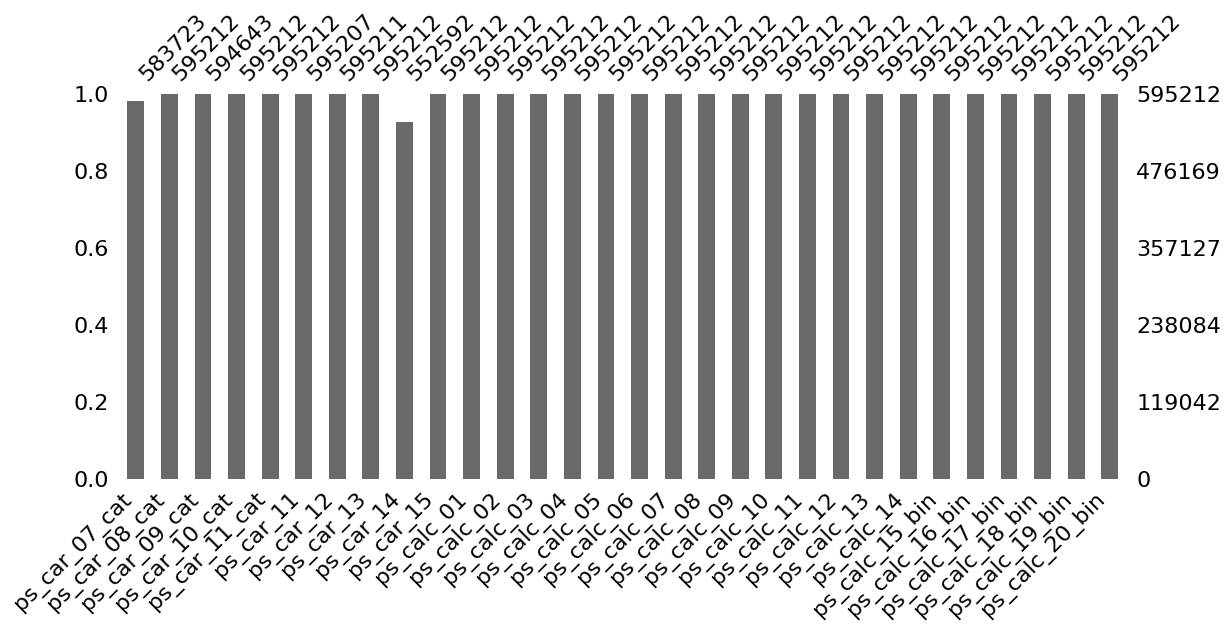

In [11]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13,5))

<Axes: >

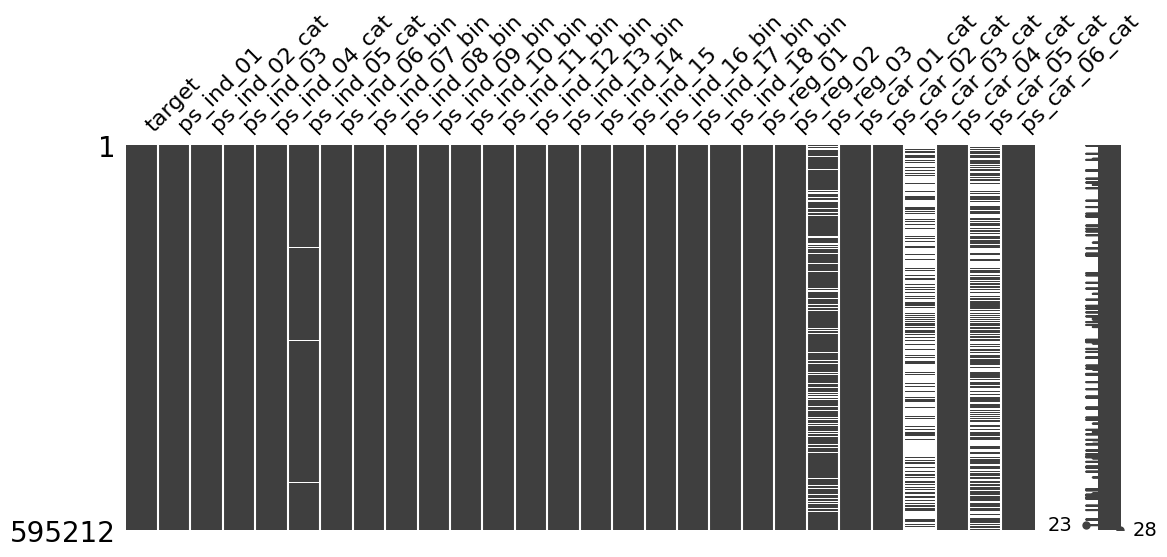

In [12]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13,5))

명목형 데이터, 이진형 데이터

피처요약표

In [22]:
summary = pd.DataFrame(train.dtypes,columns=['테이터 타입'])
summary['결측값 개수'] = (train==-1).sum().values
# summary['고유값 개수'] = train.unique().values
summary['데이터의 종류'] = None
for col in train.columns:
  if 'bin' in col or col == 'target':
    summary.loc[col,'데이터의 종류'] = '이진형'
  elif 'cat' in col:
    summary.loc[col,'데이터의 종류'] = '명목형'
  elif train[col].dtypes == float:
    summary.loc[col,'데이터의 종류'] = '연속형'
  elif train[col].dtypes == int:
    summary.loc[col,'데이터의 종류'] = '순서형'
summary

,테이터 타입,결측값 개수,데이터의 종류
id,int64,0,순서형
target,int64,0,이진형
ps_ind_01,int64,0,순서형
ps_ind_02_cat,int64,216,명목형
ps_ind_03,int64,0,순서형
ps_ind_04_cat,int64,83,명목형
ps_ind_05_cat,int64,5809,명목형
ps_ind_06_bin,int64,0,이진형
ps_ind_07_bin,int64,0,이진형
ps_ind_08_bin,int64,0,이진형


In [23]:
summary[summary['데이터의 종류'] =='명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [24]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

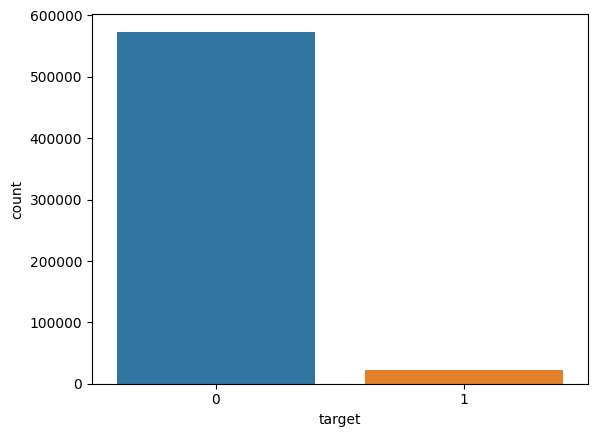

In [26]:
sns.countplot(data=train,x='target')

In [27]:
# 통계적 유효성 barplot()을 그릴때 나타는 신뢰구간으로 판단
# 신뢰구간이 좁으면 통계적으로 유효하다고 봄, 구간이 넓으면 신뢰하기 어려움
# 고윳값별로 타깃값이 1의 비율이 충분히 차이가나고, 신뢰구간도 작은 피처들이 모델링에 도움이됨

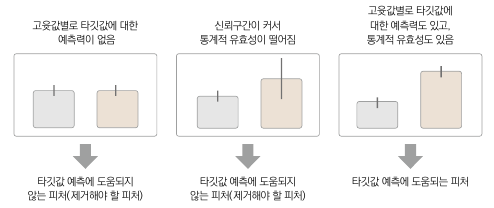

In [29]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

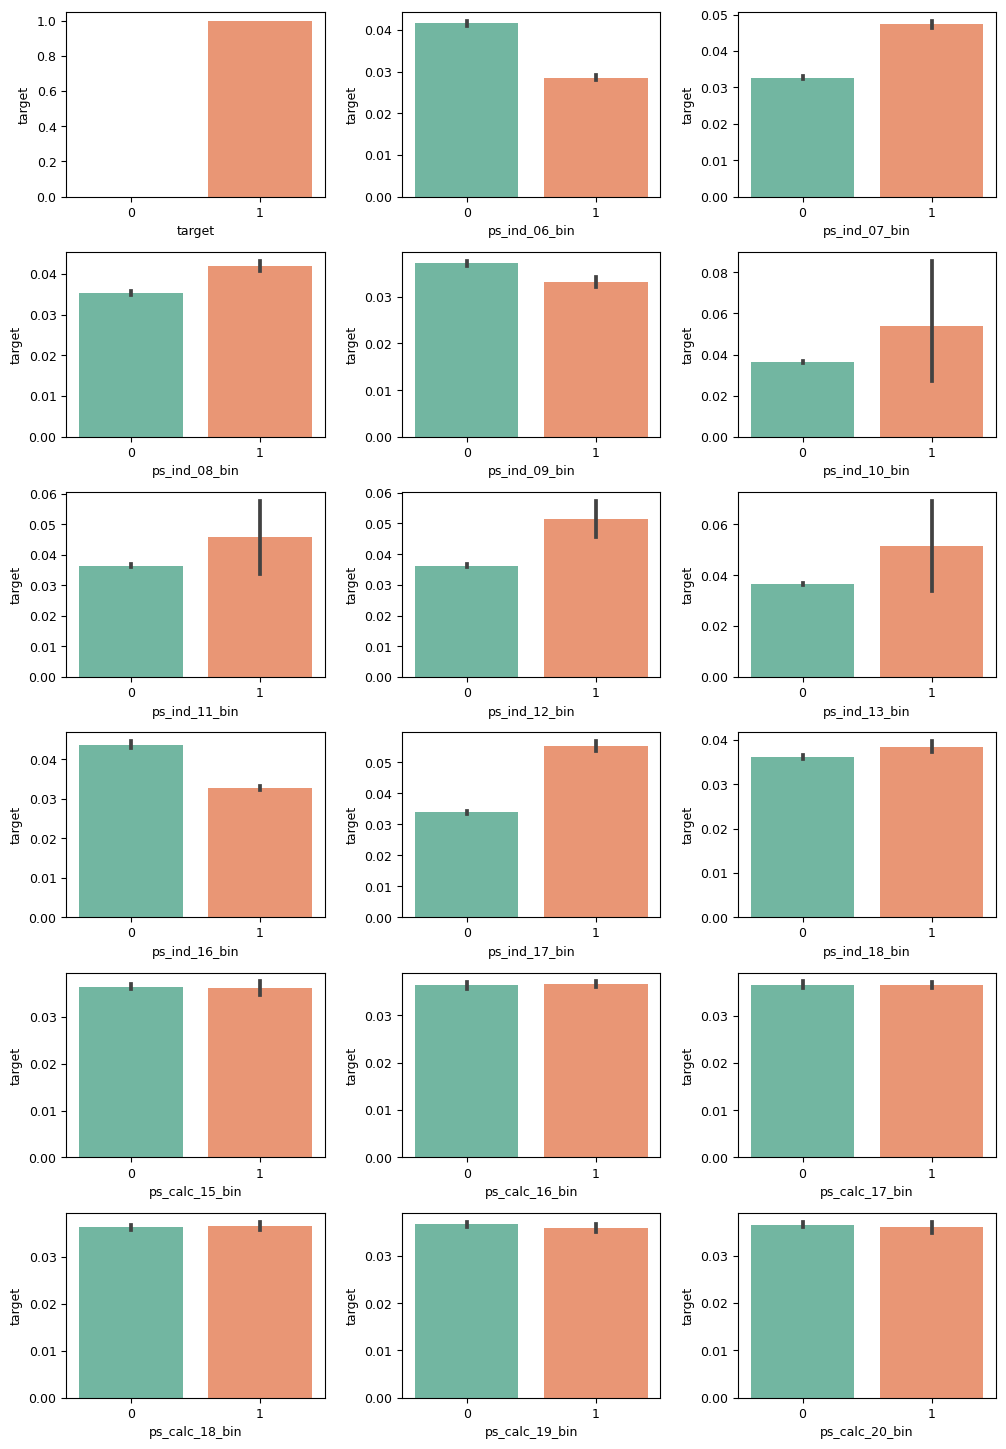

In [30]:
mlp.rc('font', size=9)
plt.figure(figsize=(12,18))
grid = gridspec.GridSpec(6,3) # 서브플랏 배치
plt.subplots_adjust(wspace=0.3, hspace=0.3) #좌우 상하 여백
bin_feature = summary[summary['데이터의 종류'] =='이진형'].index
for idx, feature in enumerate(bin_feature):
  ax = plt.subplot(grid[idx])
  sns.barplot(x=feature,y='target',data=train,palette='Set2',ax=ax)

명목형

In [31]:
len(summary[summary['데이터의 종류'] =='명목형'].index)

14

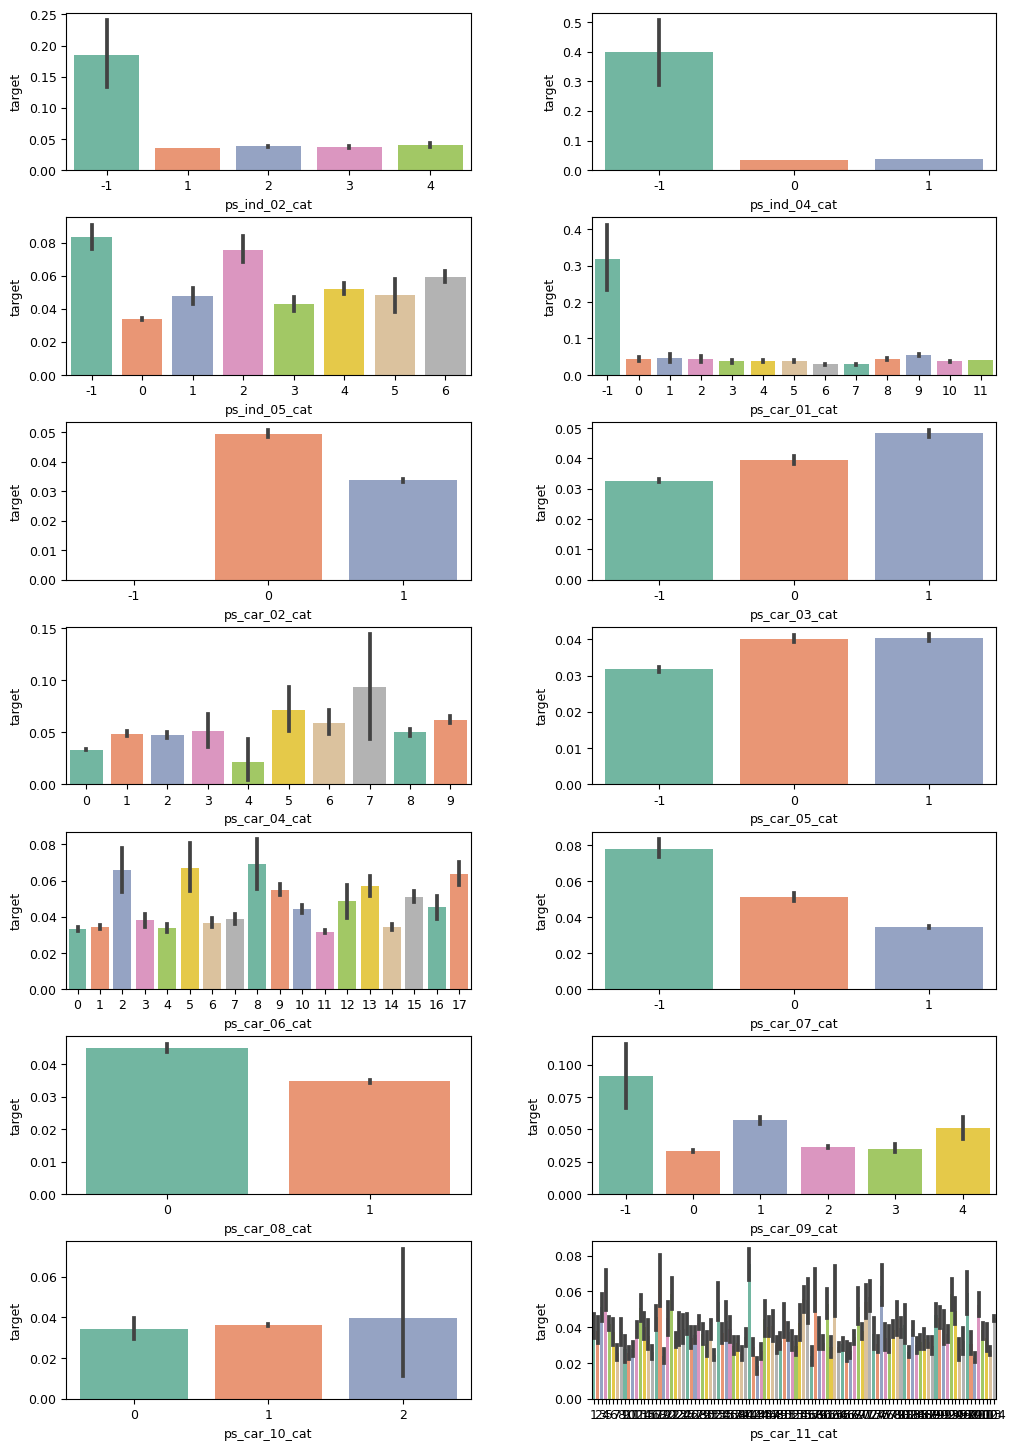

In [32]:
mlp.rc('font', size=9)
plt.figure(figsize=(12,18))
grid = gridspec.GridSpec(7,2) # 서브플랏 배치
plt.subplots_adjust(wspace=0.3, hspace=0.3) #좌우 상하 여백
cat_feature = summary[summary['데이터의 종류'] =='명목형'].index
for idx, feature in enumerate(cat_feature):
  ax = plt.subplot(grid[idx])
  sns.barplot(x=feature,y='target',data=train,palette='Set2',ax=ax)

상관관계
  - 연속형 피처
  - 결측치 제거

In [34]:
train_copy = train_copy.dropna()

<Axes: >

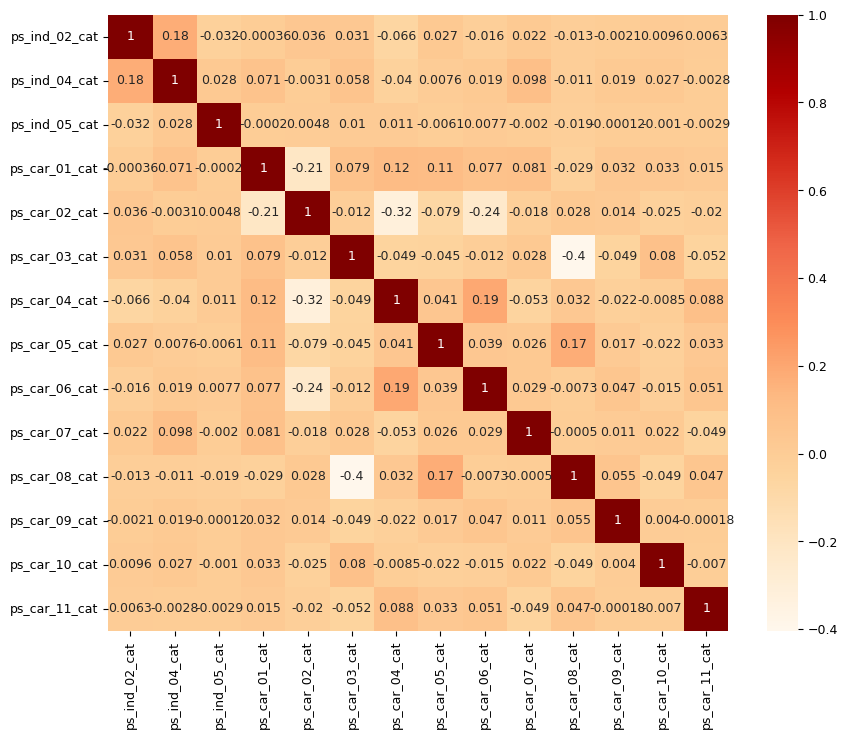

In [36]:
count_features =  summary[summary['데이터의 종류'] =='명목형'].index
plt.figure(figsize=(10,8))
count_corr = train_copy[count_features].corr()
sns.heatmap(count_corr, annot =True, cmap='OrRd')

상관관계가 높은 피처는 둘중에 하나 제거
  - 제거후 간략한 성능 테스트
  - 만약 제거전후로 성능이 떨어졌으면 그대로 유지
  - 상관관계가 높은 피처는 무조건 제거대상이 아님
  - 상관관계가 높아도 모델에따라서 학습중 상쇄되거나 또는 성능향상에 오히려 영향을 주는 경우가 있음

데이터확보 - 피처엔지니어링 ------ 평가지표 - 모델훈련 - 성능검증 - 적용

             명목형 피처-원핫인코딩  정규화  ightGBM
             필요없는 피처 제거      지니계수

BaseLine

In [37]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./train.csv')

In [39]:
# 인코딩을 동일하게 하기위해 두 데이터를 합친다..
# 없고 있고..

In [40]:
all_data = pd.concat([train,test], ignore_index=True)
all_data =  all_data.drop('target',axis=1)
all_data

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190419,1488013,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
1190420,1488016,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
1190421,1488017,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0
1190422,1488021,5,2,3,1,0,0,0,1,0,...,4,1,4,2,0,1,1,1,0,0


In [41]:
from sklearn.preprocessing import OneHotEncoder
# cat 명목형 피처 추출
cat_feature = [feature for feature in all_data.columns if 'cat' in feature]
onehot = OneHotEncoder()
encoded_cat_matrix =  onehot.fit_transform(all_data[cat_feature])
encoded_cat_matrix

<1190424x184 sparse matrix of type '<class 'numpy.float64'>'
	with 16665936 stored elements in Compressed Sparse Row format>

필요없는 피처 제거
  - 타겟별 비율에따른 신뢰구간을 통해 제거대상

In [43]:
train.columns
drop_feature = ['ps_ind_14','ps_ind_10_bin','ps_ind_11_bin'
,'ps_ind_12_bin','ps_ind_13_bin','ps_car_14'  ]
# 명목형피처(onthot), calc 피처, drop_feature를 제외한 나머지
remaining_features = [feature for feature in all_data.columns
  if ('cat' not in feature and 'calc' not in feature and feature not in drop_feature)]

In [44]:
from scipy import sparse
all_data_sprs = sparse.hstack([
    sparse.csr_matrix(all_data[remaining_features]),
    encoded_cat_matrix
])

In [45]:
# sparse.csr_matrix --> 전달받은 데이터를 CSR 형식으로 변경
# 희소행렬(spares matrix) : 대부분이 0으로 채워진 행렬
# 밀집행렬(dense matrix) : 대부분이 0이 아닌 값으로 채워진 행렬
# 희소행렬을 COO, CSR형태로 표현 ->메모리 절약,  CSR

In [46]:
all_data_sprs

<1190424x202 sparse matrix of type '<class 'numpy.float64'>'
	with 31292324 stored elements in Compressed Sparse Row format>

In [ ]:
# 지니계수는 로렌츠 곡선을 이용해서 그린다.

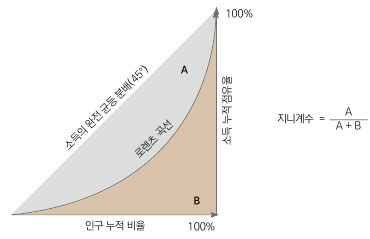

In [47]:
# 머신러닝에서는 지니계수를 모델의 예측 성능을 측정도구
# 예측값을 크기순으로 정렬해서
# 지니계수는 (2 x ROC ACU -1) 같음
# 정규화한 지니계수는
#   값을 0 ~1 조정
# 정규화한 지니계수는 0에까가울수록 성능이 나쁘다
# 정규화지니계수 = (예측값에대한 지니계수) / (예측이 완벽할때의 지니계수)
# 예측값에대한 지니계수 : 예측값과 실제값
# 예측이 완벽할때의 지니계수 : 실제값과 실제값으로 구한

In [57]:
import numpy as np
def eval_gini(y_true, y_pred):
  assert y_true.shape == y_pred.shape
  n_samples =  y_true.shape[0]  #데이터 개수
  L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선의 값
  # 예측값에대한 지니계수
  pred_order = y_true[y_pred.argsort()] # y_pred크기순으로 y_true 값 정렬
  L_pred = np.cumsum(pred_order) / np.sum(pred_order)  # 로렌츠 곡선
  G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수
  # 예측이 완벽할때의 지니계수
  true_order = y_true[y_true.argsort()] # y_true크기순으로 y_true 값 정렬
  L_true = np.cumsum(true_order) / np.sum(true_order)  # 로렌츠 곡선
  G_true = np.sum(L_mid - L_true) # 예측값에 대한 지니계수

  # 정규화된 지니계순
  return G_pred / G_true

In [50]:
# LightGBM용 gini()

In [51]:
def gini(preds,dtrain):
  labels = dtrain.get_label()
  return 'gini', eval_gini(labels, preds), True

In [53]:
from sklearn.model_selection import StratifiedKFold  #균등하게 분할
folds = StratifiedKFold(shuffle=True)
params = {
    'objective':'binary',
    'learning_rate':0.01,
    'force_row_wise':True,  # 경고문구 없애기
    'random_state':0
}

In [54]:
num_train = len(train)
X = all_data_sprs[:num_train]
X_test =all_data_sprs[num_train:]
y = train['target'].values

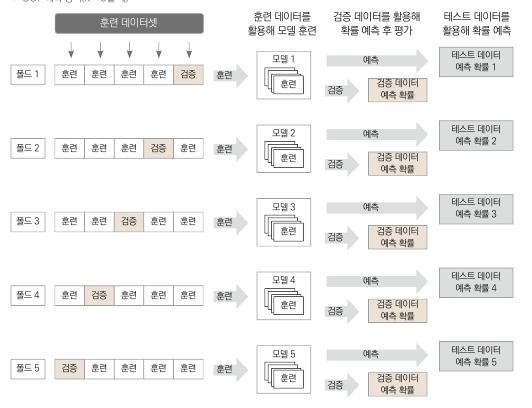

In [55]:
import lightgbm as lgb

In [ ]:
oof_val_preds = np.zeros(X.shape[0])
oof_teset_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):
  X_train, y_train = X[train_idx], y[train_idx]
  X_valid, y_valid = X[valid_idx], y[valid_idx]
  # ligthGMB 전용 데이터셋
  dtrain = lgb.Dataset(X_train, y_train)
  dvalid = lgb.Dataset(X_valid, y_valid)

  # ligthGMB 훈련
  lgb_model = lgb.train(params=params,train_set=dtrain,
                        num_boost_round=1000,  # 부스팅 반복횟수
                        valid_sets=dvalid,
                        feval=gini,
                        early_stopping_rounds=100,
                        verbose_eval=100
                        )
  oof_teset_preds +=  lgb_model.predict(X_test)/folds.n_splits
  oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
  gini_score = eval_gini(y_valid,oof_val_preds[valid_idx])
  print(f"폴드{idx+1} 지니계수:{gini_score}\n")

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153664	valid_0's gini: 0.243202
[200]	valid_0's binary_logloss: 0.152954	valid_0's gini: 0.252591
